<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 2 Redes Neuronales Artificiales - 2020-2 </h1>

<H3 align='center'> Integrantes: Paula Nieto  - Gabriela Sepúlveda </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Recurrent Neural Networks
* LSTM, GRU
* Autoencoders
* GAN

**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea 2]
* Fecha de entrega y presentaciones: 8 de Enero. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) RNNs para series de tiempo  <br>
[2.](#segundo) RNNs para texto <br>
[3.](#tercero) Autoencoders para imágenes <br>
[3.](#cuarto) GANs para imágenes <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes recurrentes y GPU para redes convolucionales.*.

# 4. GAN para MNIST 

Probablemente uno de los desarrollos recientes del area de las redes neuronales más interesantes son las GAN, o _Generative Adversarial Networks_. Estas han deslumbrado al mundo los últimos años generando resultados inesperados, como los llamados _deep fakes_ (https://www.youtube.com/watch?v=25GjijODWoI&ab_channel=Borked), caras no no existentes generadas artificialmente, entre muchas otras aplicaciones de las cuales las más creativas y divertidas son ampliamente divulgadas. Estos resultados nos dan cuenta que estas redes cuando son implementadas correctamente tienen la habilidad de realizar tareas muy especificas logrando desempeños que en logran incluso en algunos casos engañar a observadores humanos.

<img src="https://jrmerwin.github.io/deeplearning4j-docs/img/GANs.png" background="white">

Dependiendo del problema que uno quiera resolver las GAN no requieren datos etiquetados. Esto lo logran gracias a su estructura adversarial, es decir, donde simultaneamente se entrenan dos redes, una especializada en generar datos y otra red especializada en discriminar datos verdaderos de datos falsos, en su configuración más simple al menos. En esta parte de la tarea deberan generar una red de este tipo que genere dígitos que aparenten ser hechos a mano. Para esto utilizaremos las imágenes de entrenamiento del dataset MNIST que ya conocen.


## 4.a) Primera GAN

El código siguiente contiene todos los ingredientes para entrenar una red GAN, se encuentra áltamente comentada para su entendimiento. Usted deberá incluir funcionalidades al código, no incluya aún ninguna mejora a la arquitectura de las redes, esto se verá en el item 4.c). Las funcionalidades que debe añadir son las siguientes: 

i) Imprimir alguna medida del desempeño tanto del generador como del disciminador (por ejemplo f1-score, precision and recall o accuracy) a lo largo del entrenamiento. ¿Variaciones en esta medidas representan mejoras en nuestra red?

ii) Añadir gráficos de las entradas de data real con un título que indique la clasificación que está dando el discriminador a cada una de estas imágenes (Falsa|Real). El código entregado grafica tan solo las imágenes que genera el generador y la etiqueta que le está dando el discriminador (Falsa|Real).

**Recuero usar entorno de ejecución en GPU**

In [ ]:
from keras.datasets import mnist
import numpy as np
(x,_),(_,_) = mnist.load_data()
x = x.reshape((-1,28,28,1)).astype(np.float32)
x = x/255

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import UpSampling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
discriminator_net = Sequential() # Discriminador
discriminator_net.add(Conv2D(3, 3, strides=2, input_shape=x.shape[1:], padding='same')) #Recibe como entrada tanto imágenes generadas por el generador como imágenes del dataset
                                                                                        # de entrenamiento. Recuerden que los hiperparámetros de la red son intencionalmentes
                                                                                        # no idóneos.
discriminator_net.add(Flatten())    #Flatten para pasar a una neurona de capa densa
discriminator_net.add(Dense(1,activation='sigmoid',use_bias=False))   # La salida estará entre 0 y 1.

generator_net = Sequential() 
noise_size=50
generator_net.add(Dense(7*7*10, input_shape=[noise_size]))   # el generador recibirá como entrada ruido, el tamaño es arbitrario.
generator_net.add(Reshape((7,7,10)))    # Transforma la salida de la red densa unidimensional a tridimensional, las primeras dos pueden ser interpretadas como tamaño imágen
                                          # y la tercera como n° canales
generator_net.add(UpSampling2D())   # upsampling2d nos permite pasar de imágenes 7,7,10 a 14,14,10
generator_net.add(Conv2D(32, 5, padding='same')) # podemos añadir convolucionales dada la entrada a esta capa, la primera dimensión transformará la data
                                                      # desde 14,14,10 a 14,14,32
generator_net.add(UpSampling2D()) # pasamos de 14,14,32 a 28,28,32
generator_net.add(Conv2D(1, 6, padding='same',activation='sigmoid')) # hagamos lo que hagamos hay que asegurarse de obtener una salida 28,28,1 como es el caso en esta arquitectura

discriminator = Sequential() # Compilamos el discriminador, sin embargo debemos crear la red auxiliar a discriminator_net, para poder entrenarla independiente del generator
discriminator.add(discriminator_net)
discriminator.compile(loss='binary_crossentropy', optimizer = RMSprop(lr=1e-2), metrics=['acc']) # compilamos con binary cross entropy

gan = Sequential() # GAN contendrá al generador y al discriminador en serie
gan.add(generator_net) # añadimos inicialmente el generador
for layer in discriminator_net.layers: # y luego el discriminador 
    layer.trainable = False # nos preocupamos de dejar esta capa no entrenable por el compilador, puesto este discrimiador se entrenará con la data real para identificar real|fake
gan.add(discriminator_net) # añadimos las capas ya modificadas para no ser entrenadas
gan.compile(loss='binary_crossentropy', optimizer = RMSprop(lr=1e-2), metrics=['acc']) #compilamos

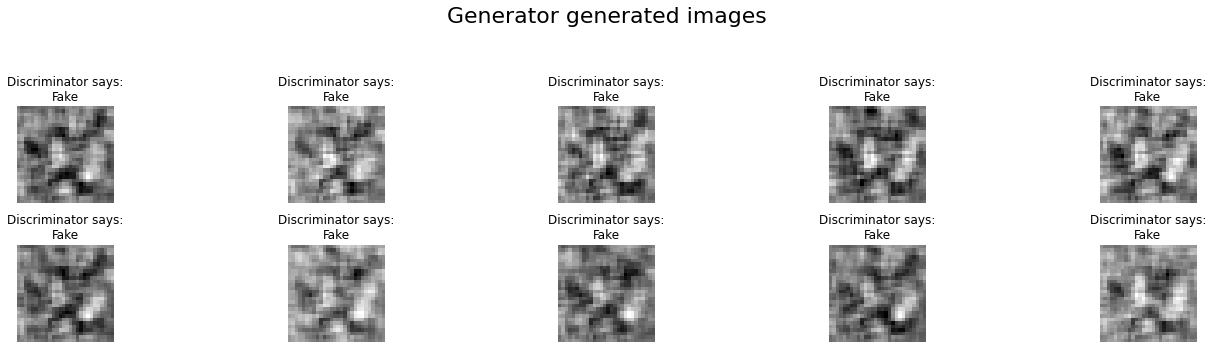

------------------------------------------------------------------------------------------------------------------------


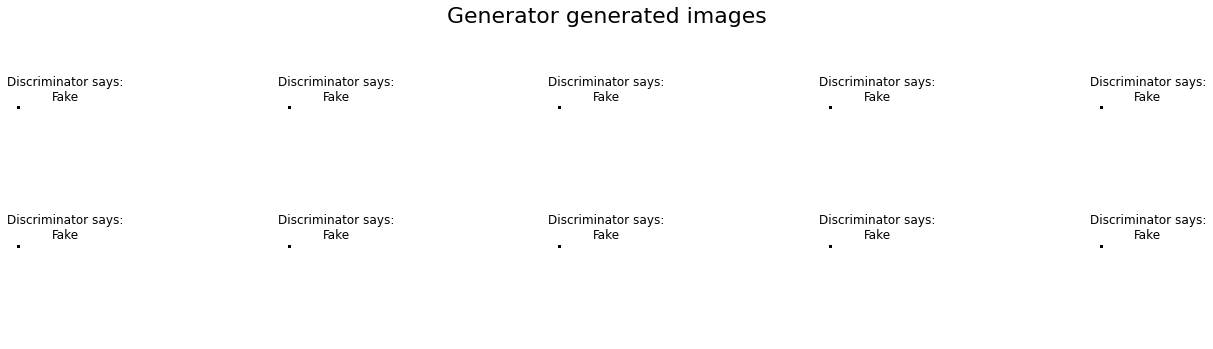

------------------------------------------------------------------------------------------------------------------------


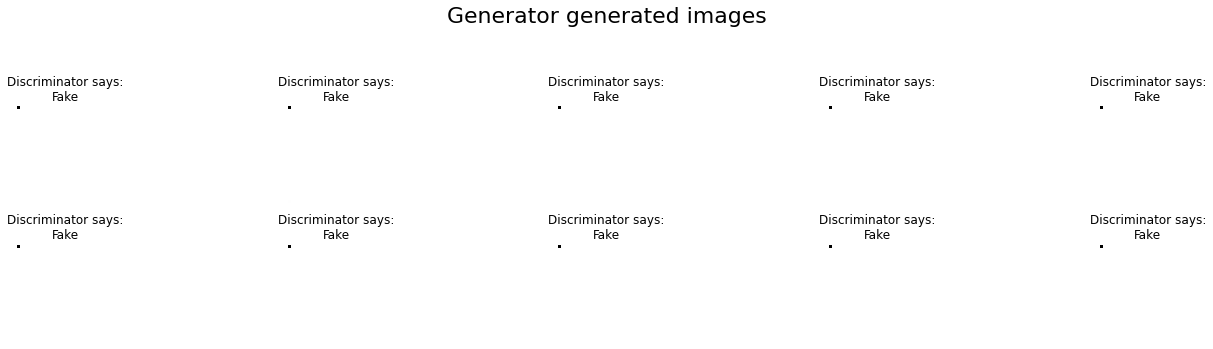

------------------------------------------------------------------------------------------------------------------------


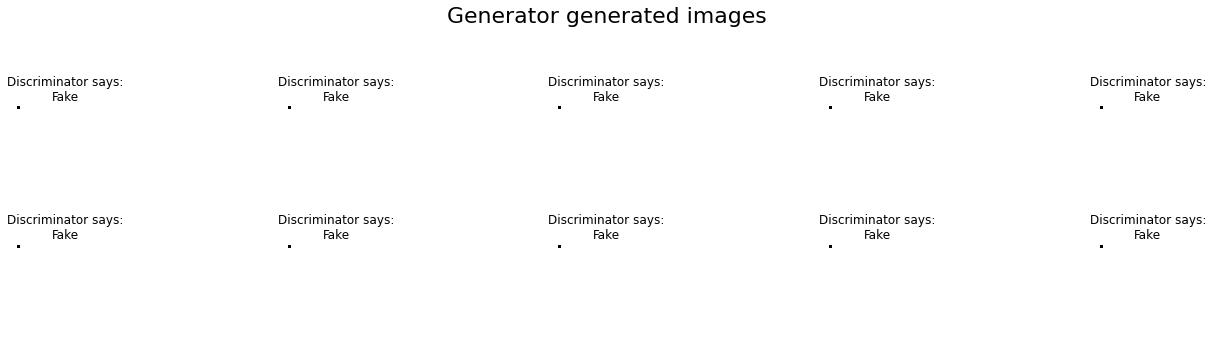

------------------------------------------------------------------------------------------------------------------------


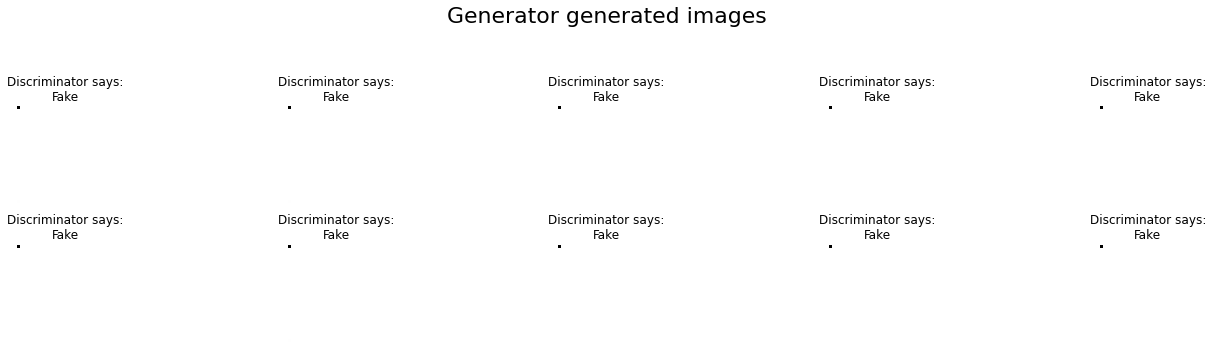

------------------------------------------------------------------------------------------------------------------------


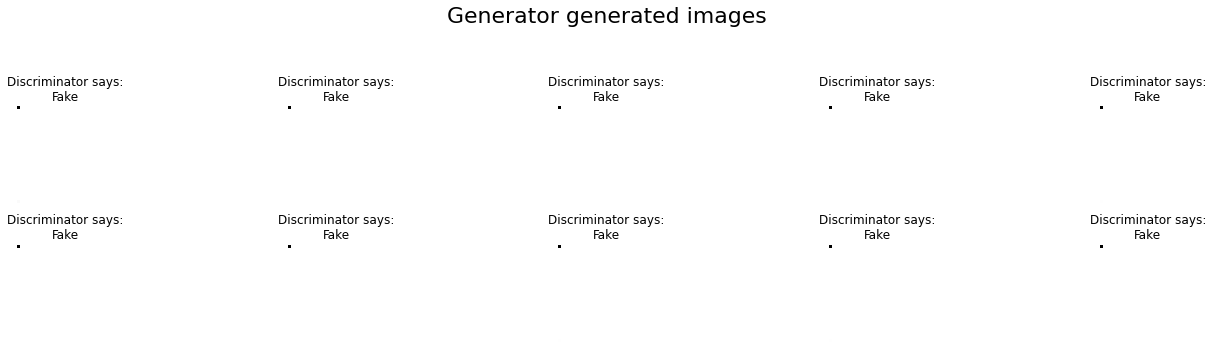

------------------------------------------------------------------------------------------------------------------------


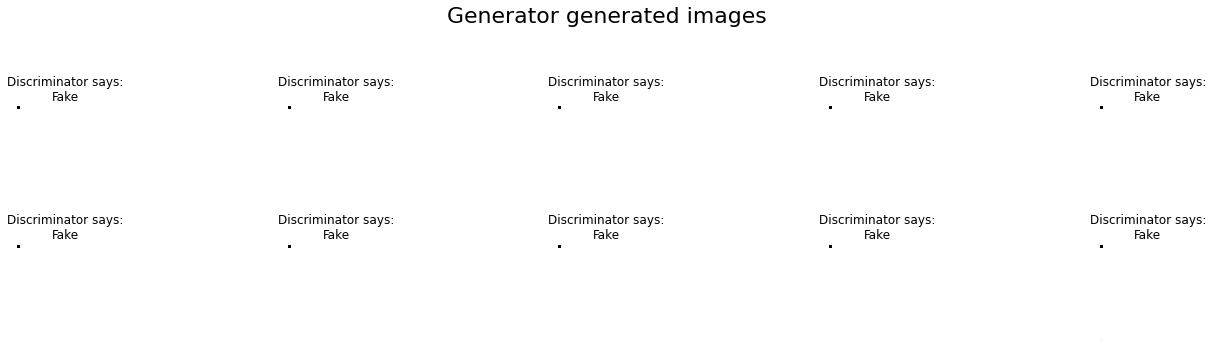

------------------------------------------------------------------------------------------------------------------------


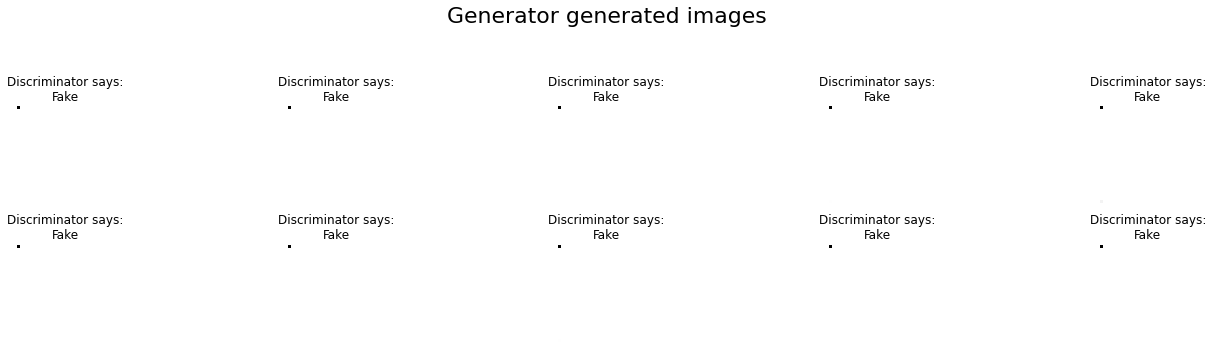

------------------------------------------------------------------------------------------------------------------------


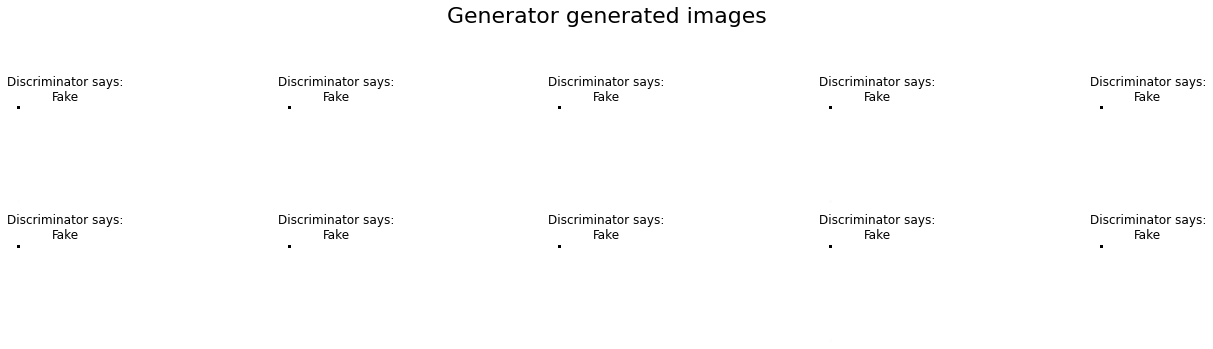

------------------------------------------------------------------------------------------------------------------------


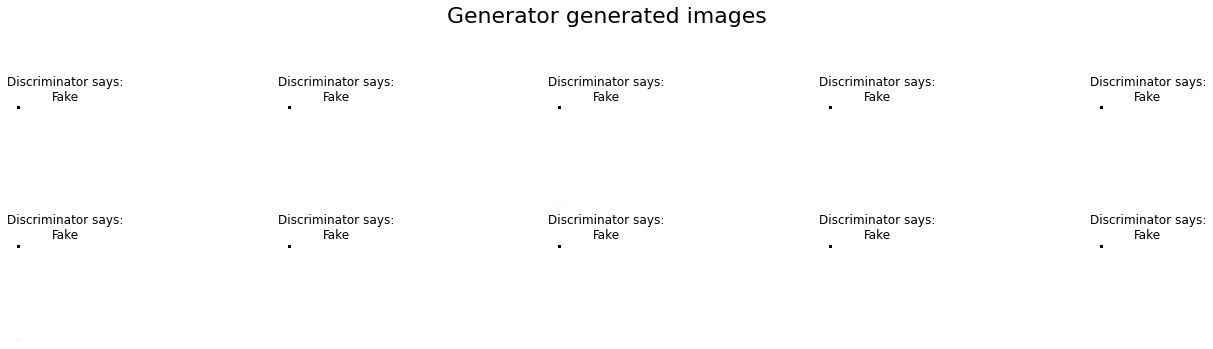

------------------------------------------------------------------------------------------------------------------------


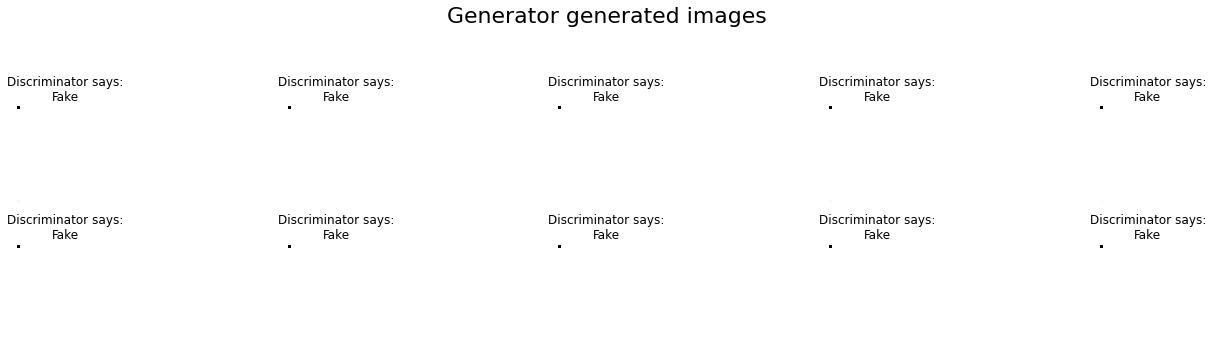

------------------------------------------------------------------------------------------------------------------------


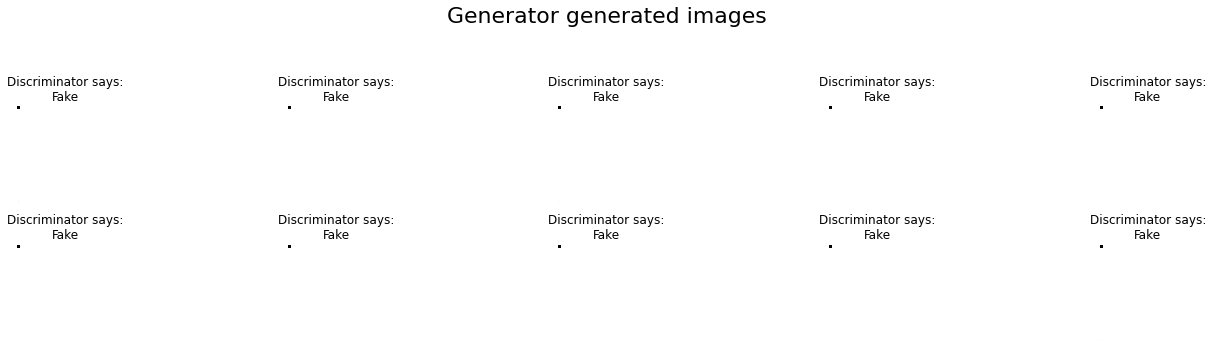

------------------------------------------------------------------------------------------------------------------------


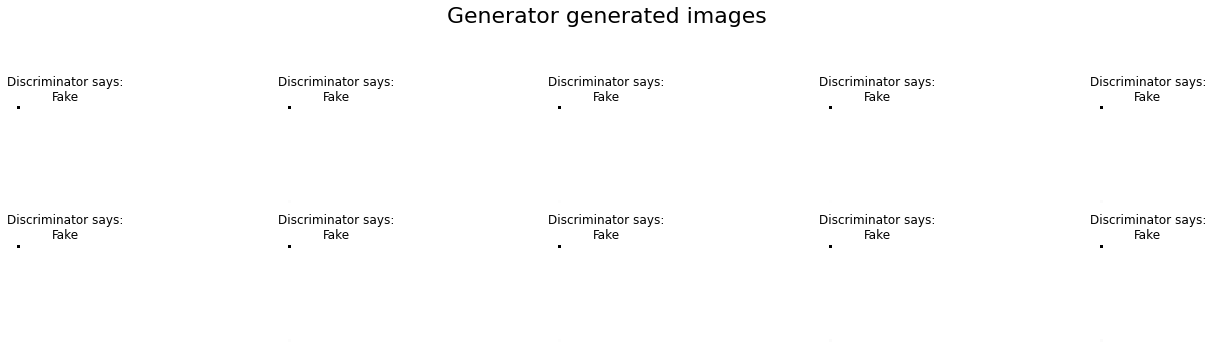

------------------------------------------------------------------------------------------------------------------------


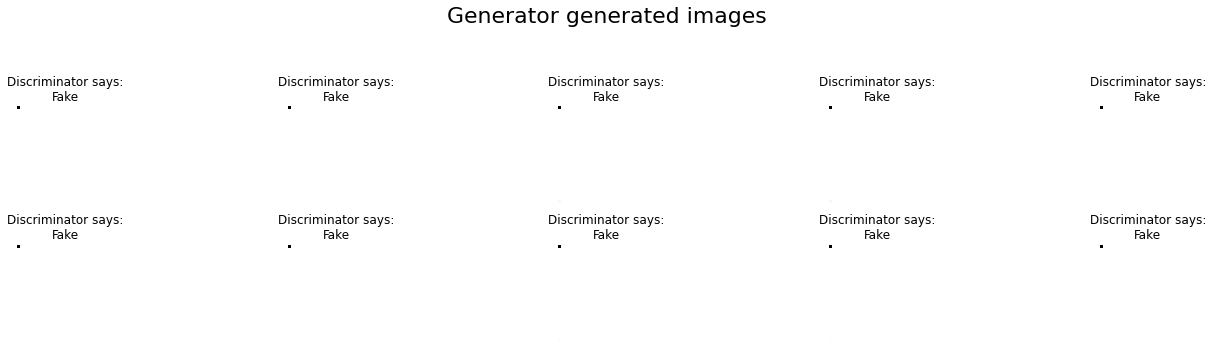

------------------------------------------------------------------------------------------------------------------------


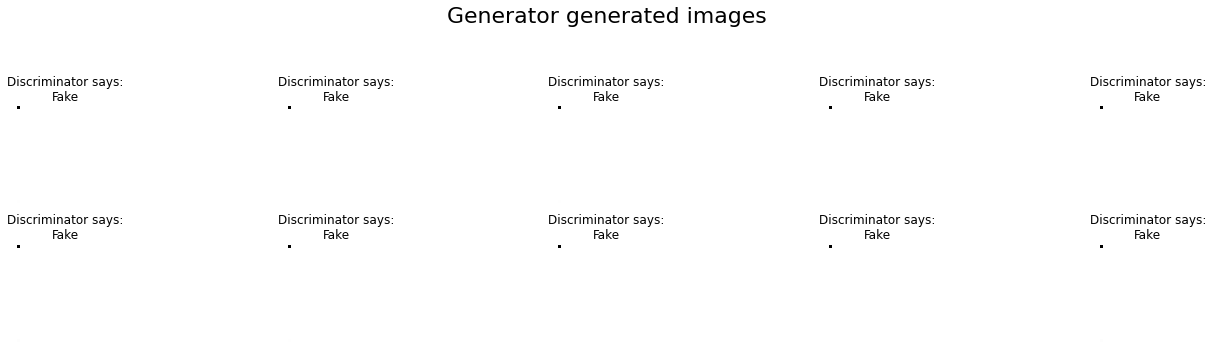

------------------------------------------------------------------------------------------------------------------------


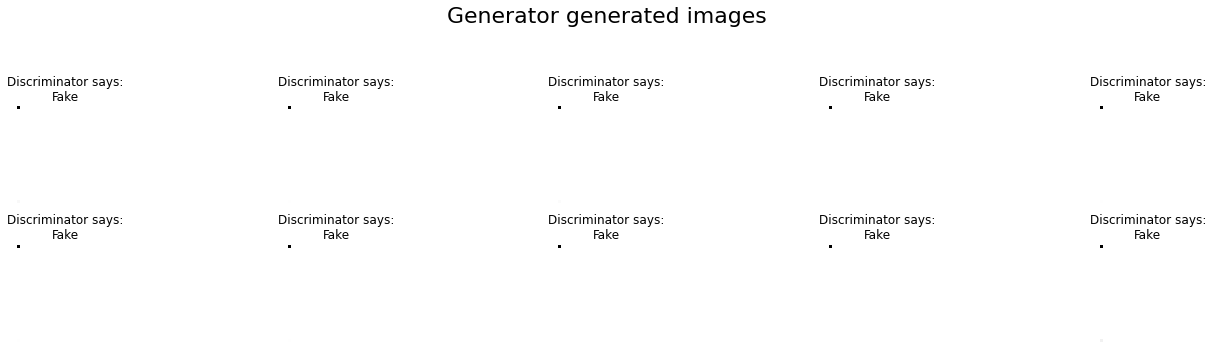

------------------------------------------------------------------------------------------------------------------------


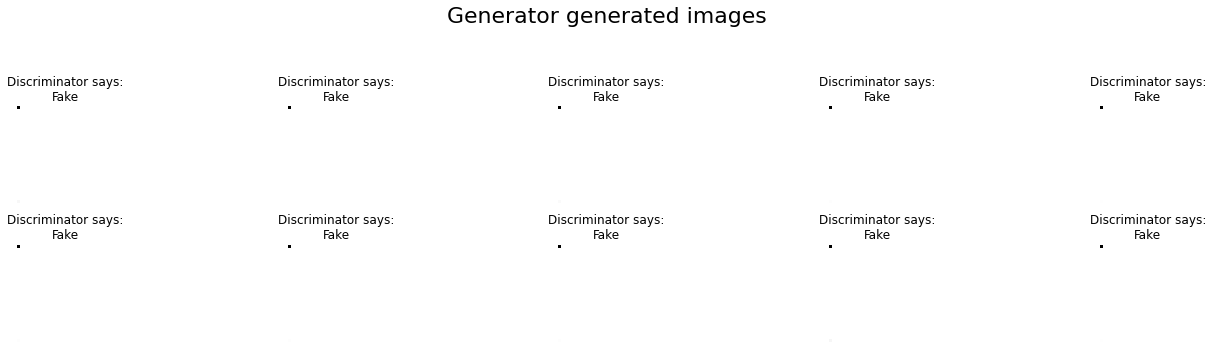

------------------------------------------------------------------------------------------------------------------------


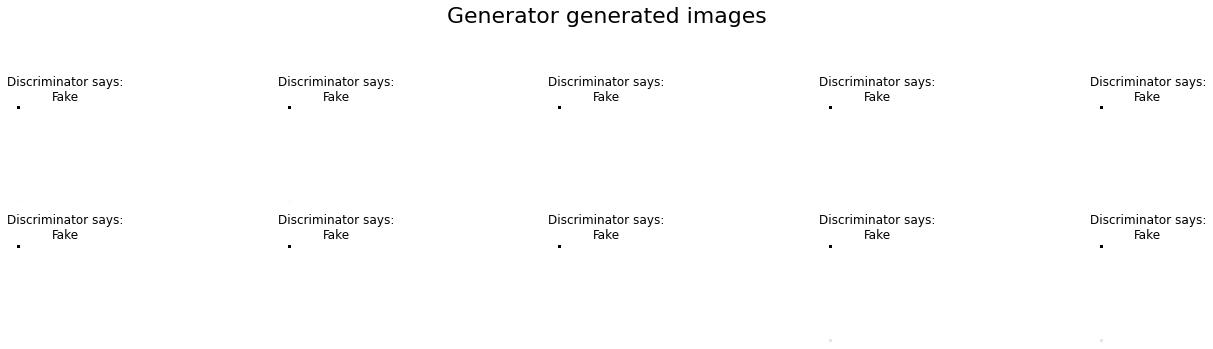

------------------------------------------------------------------------------------------------------------------------


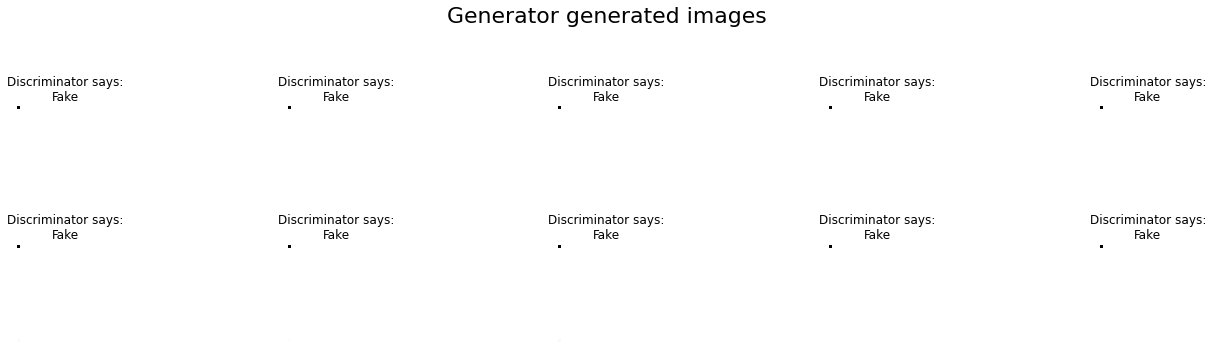

------------------------------------------------------------------------------------------------------------------------


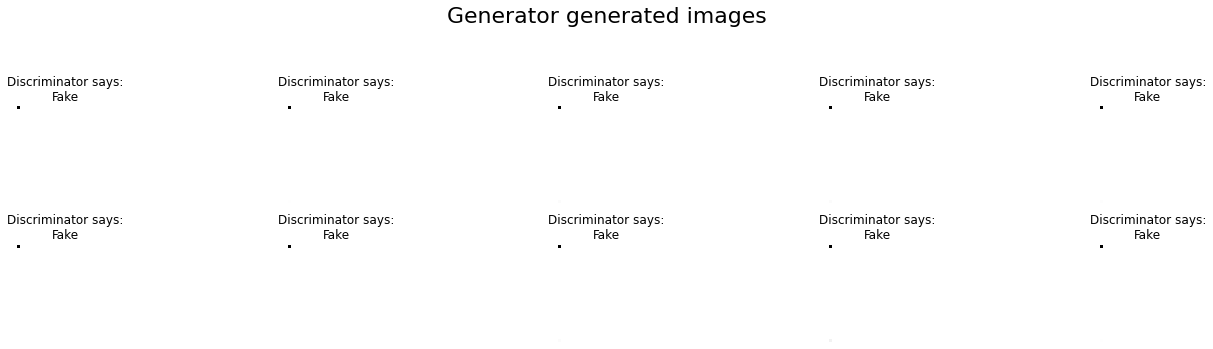

------------------------------------------------------------------------------------------------------------------------


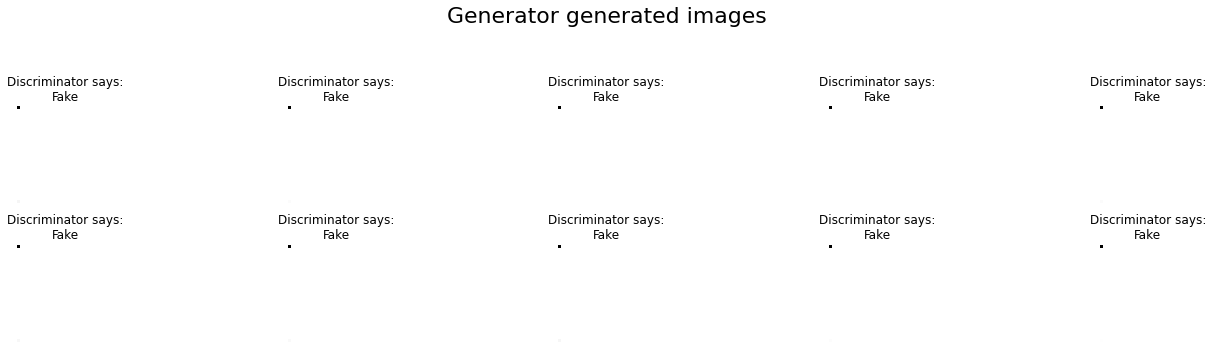

------------------------------------------------------------------------------------------------------------------------


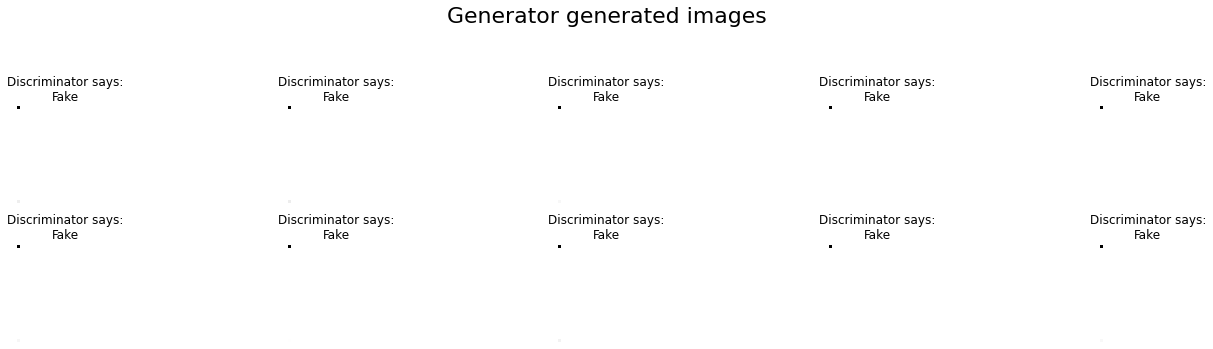

------------------------------------------------------------------------------------------------------------------------


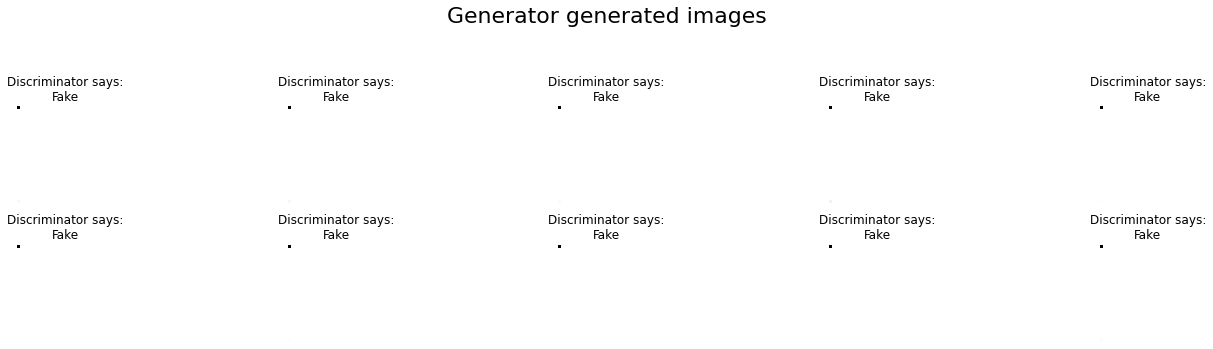

------------------------------------------------------------------------------------------------------------------------


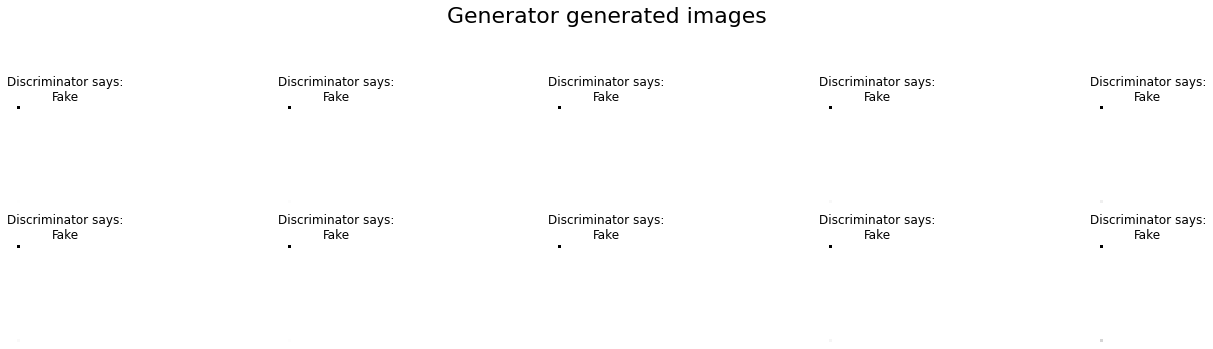

------------------------------------------------------------------------------------------------------------------------


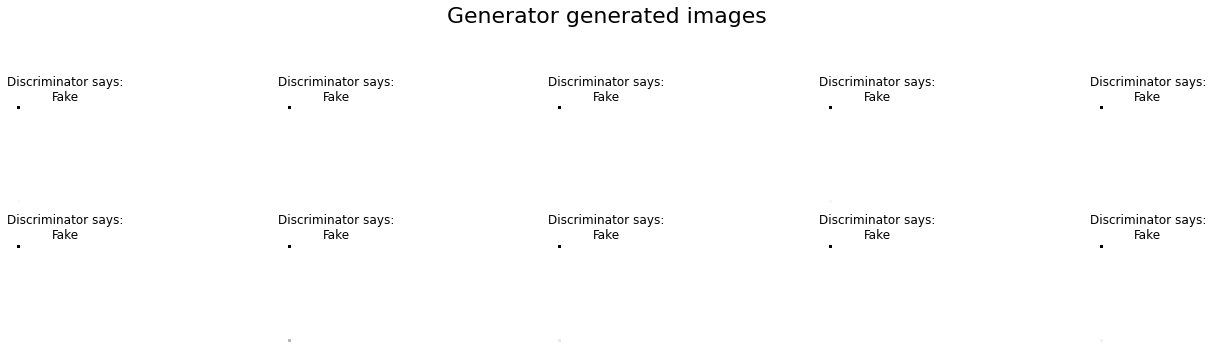

------------------------------------------------------------------------------------------------------------------------


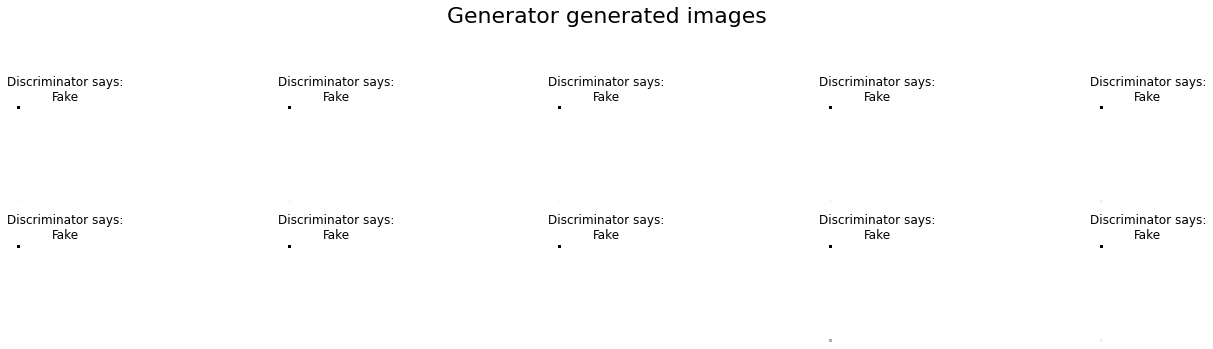

------------------------------------------------------------------------------------------------------------------------


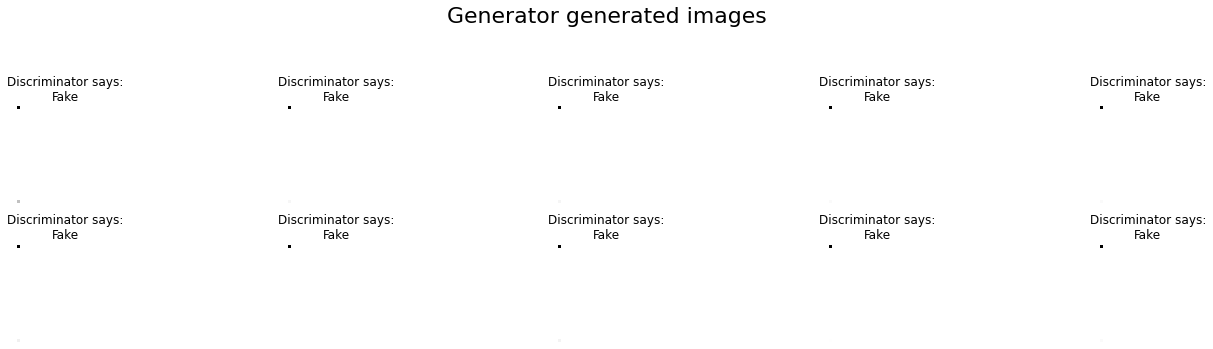

------------------------------------------------------------------------------------------------------------------------


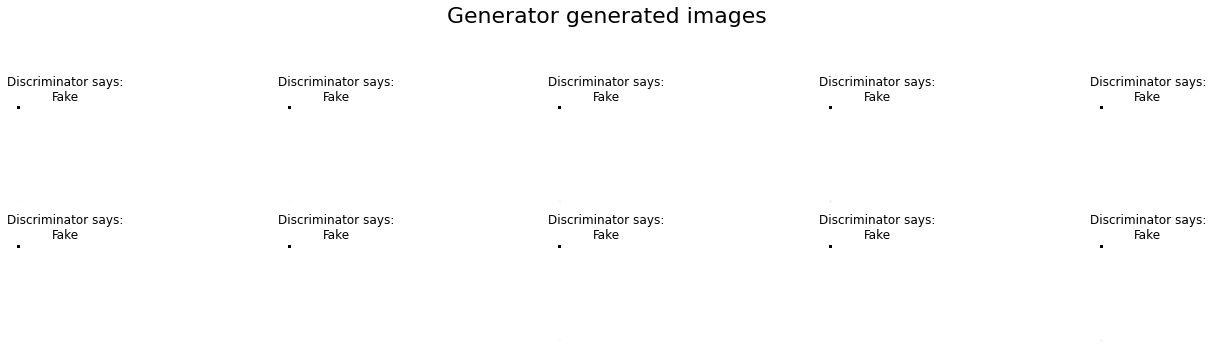

------------------------------------------------------------------------------------------------------------------------


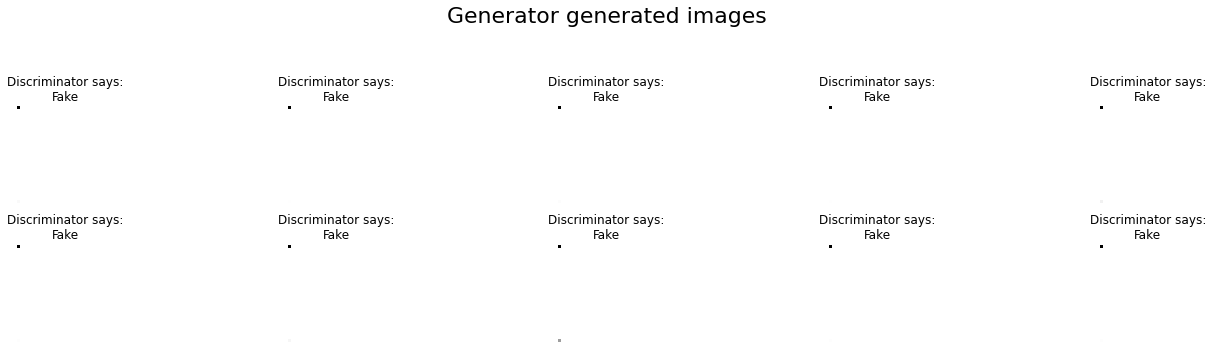

------------------------------------------------------------------------------------------------------------------------


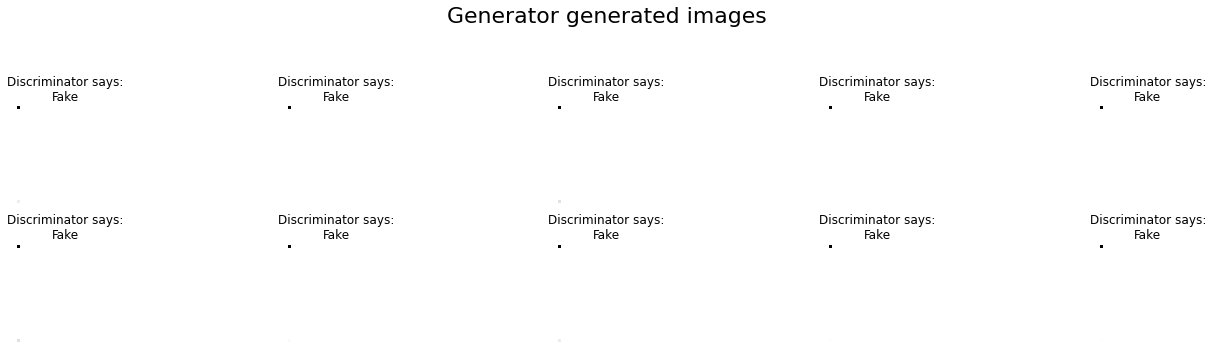

------------------------------------------------------------------------------------------------------------------------


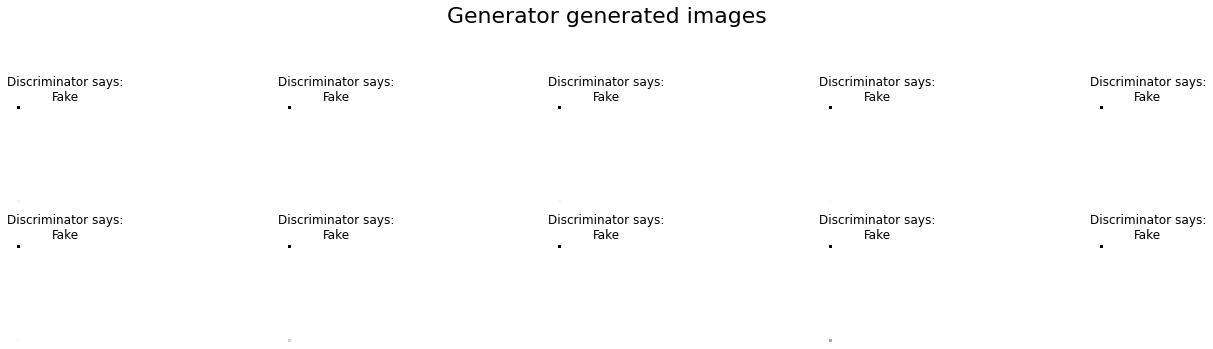

------------------------------------------------------------------------------------------------------------------------


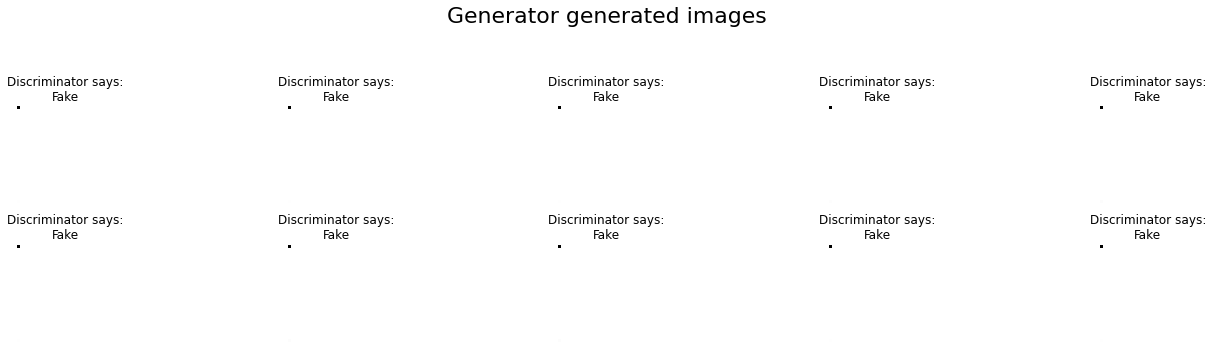

------------------------------------------------------------------------------------------------------------------------


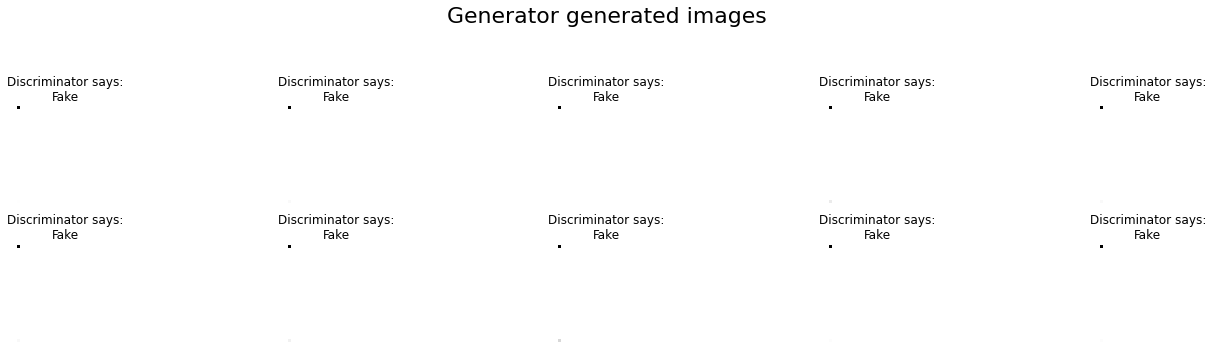

------------------------------------------------------------------------------------------------------------------------


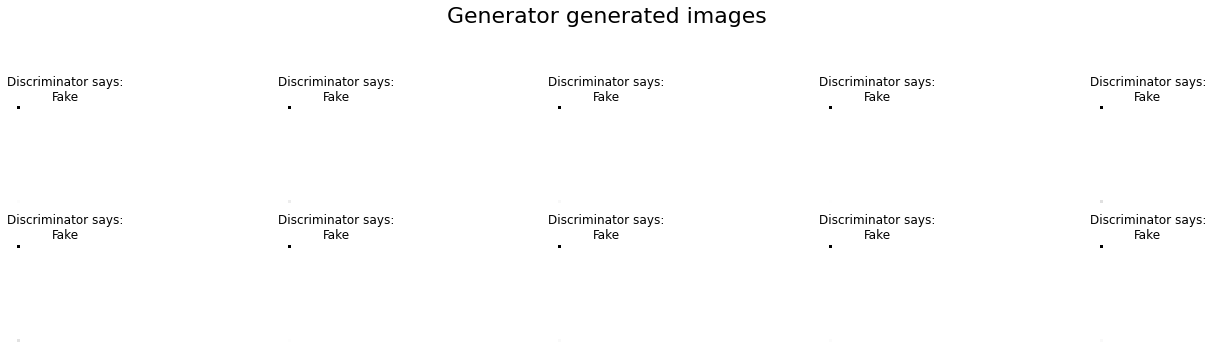

------------------------------------------------------------------------------------------------------------------------


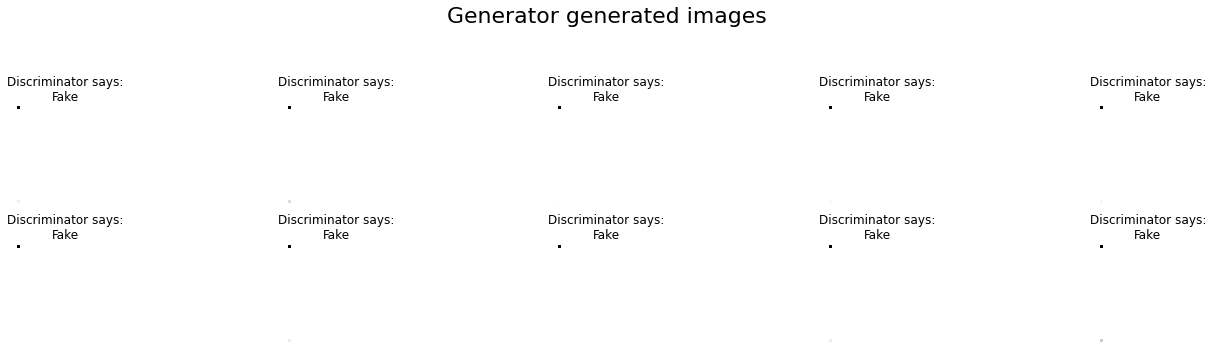

------------------------------------------------------------------------------------------------------------------------


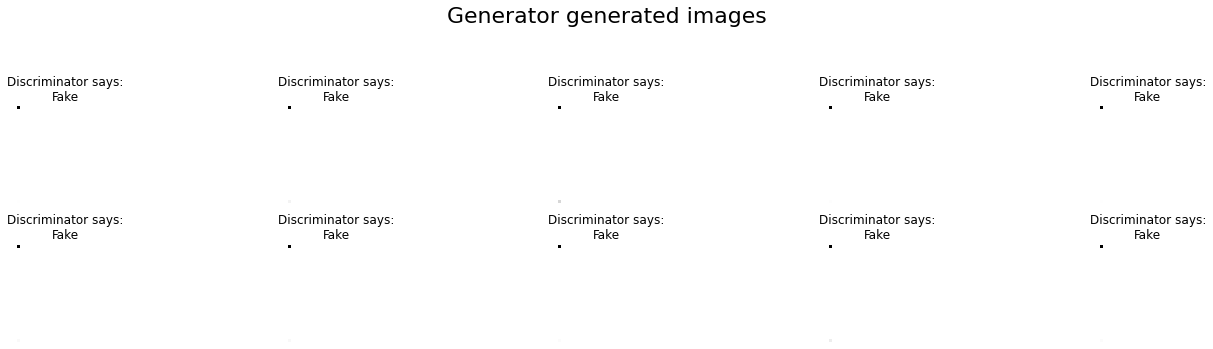

------------------------------------------------------------------------------------------------------------------------


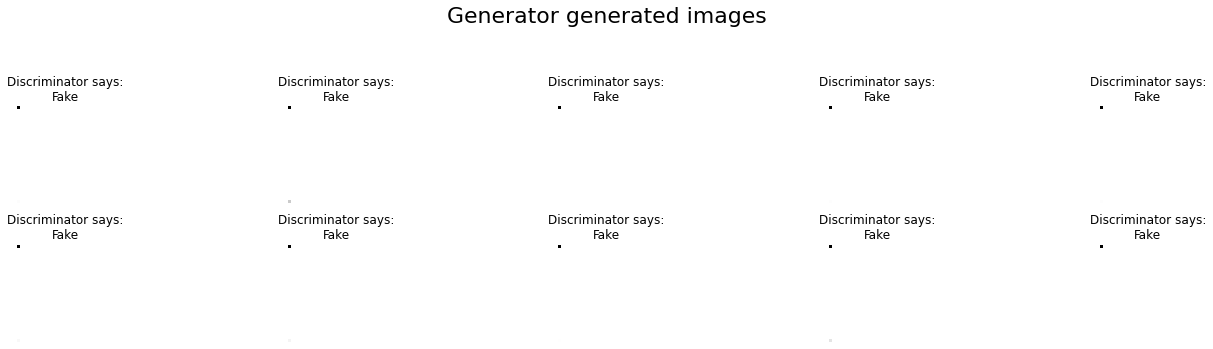

------------------------------------------------------------------------------------------------------------------------


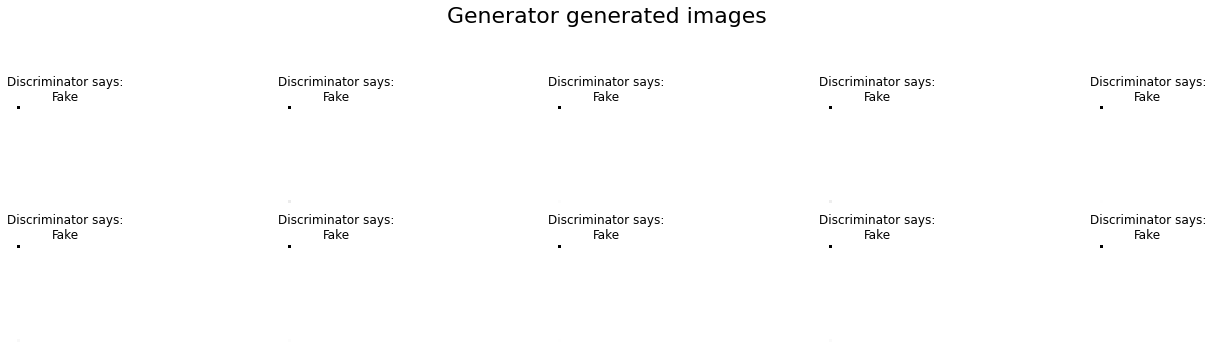

------------------------------------------------------------------------------------------------------------------------


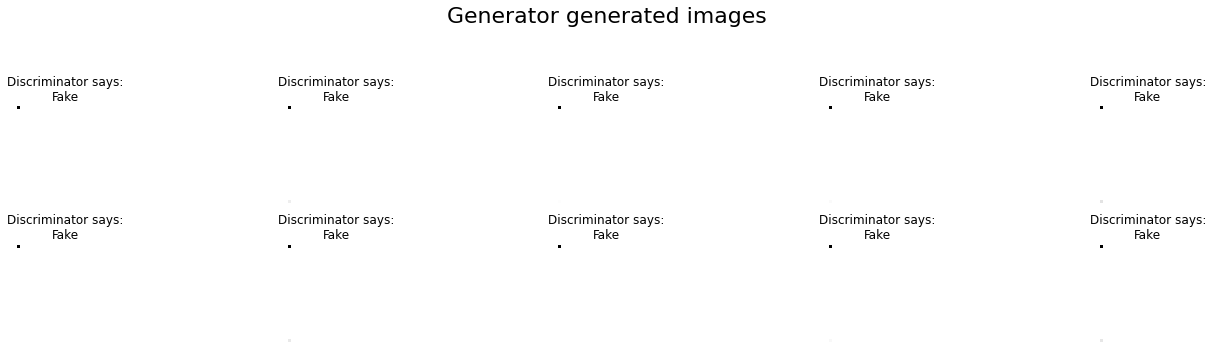

------------------------------------------------------------------------------------------------------------------------


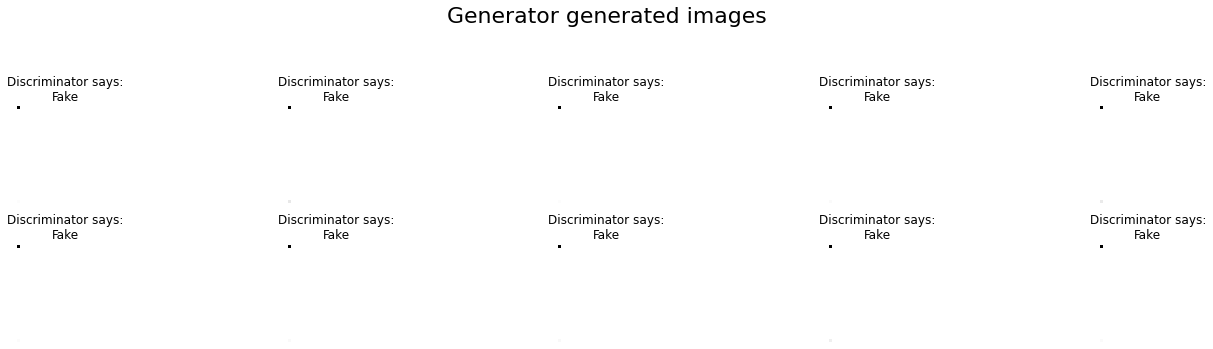

------------------------------------------------------------------------------------------------------------------------


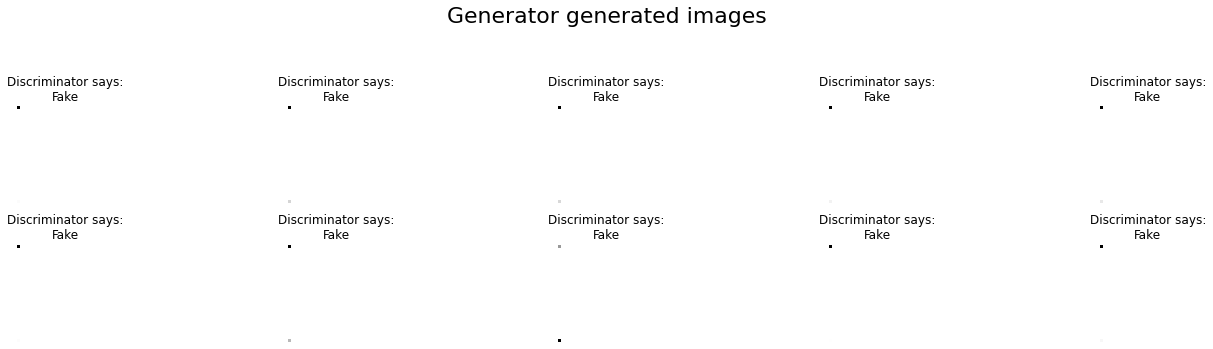

------------------------------------------------------------------------------------------------------------------------


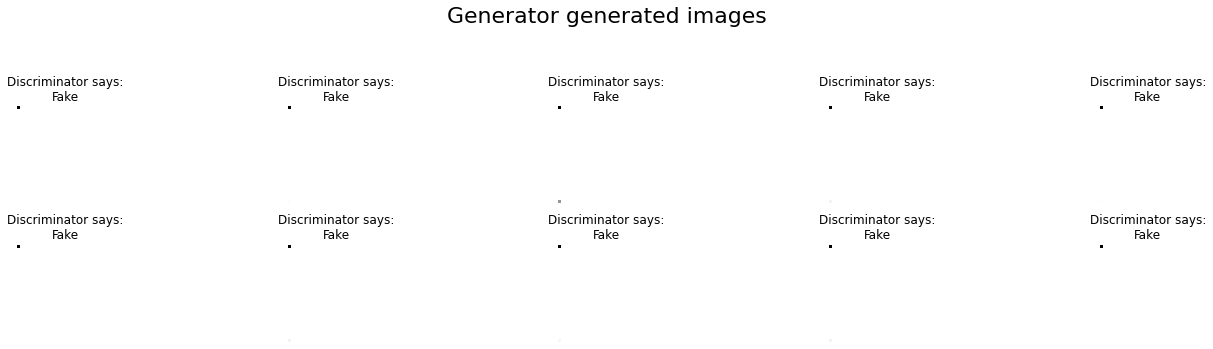

------------------------------------------------------------------------------------------------------------------------


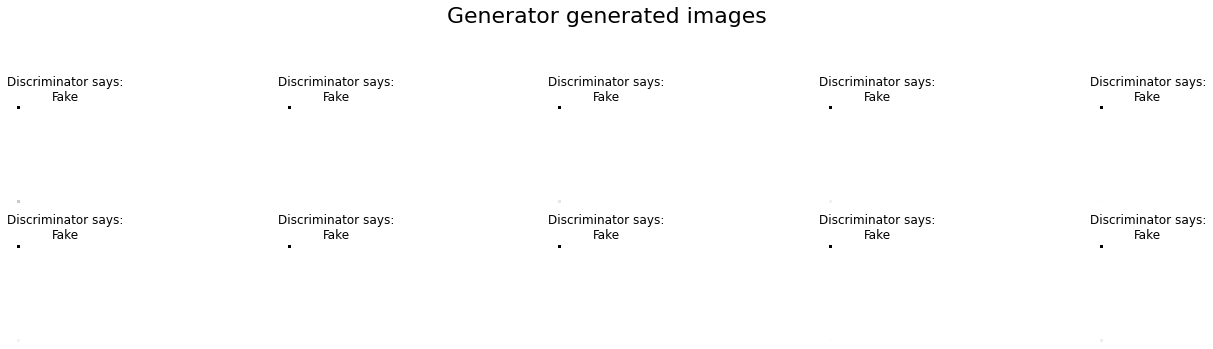

------------------------------------------------------------------------------------------------------------------------


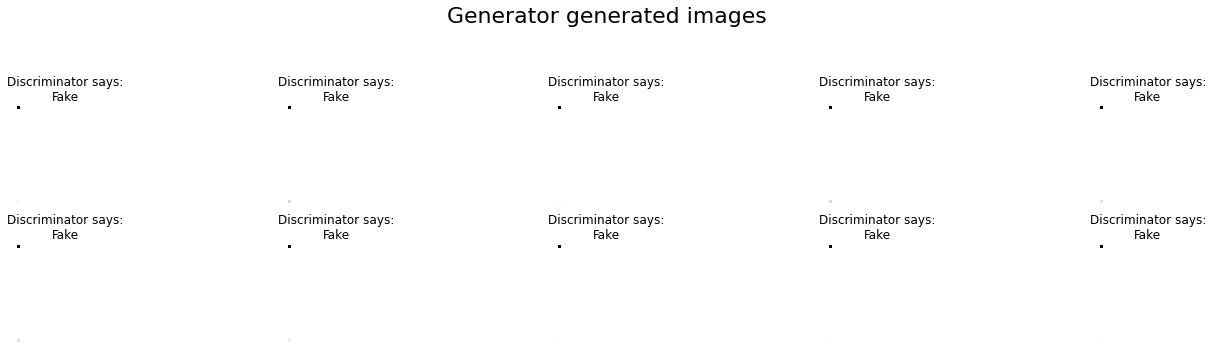

------------------------------------------------------------------------------------------------------------------------


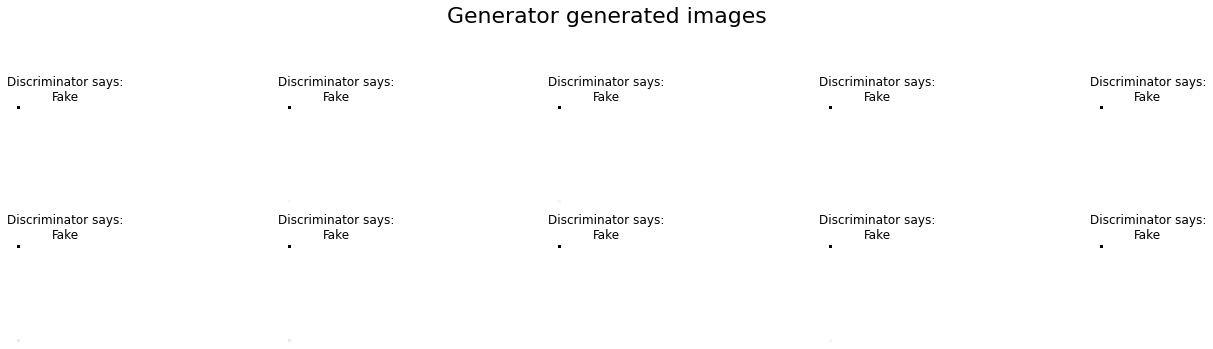

------------------------------------------------------------------------------------------------------------------------


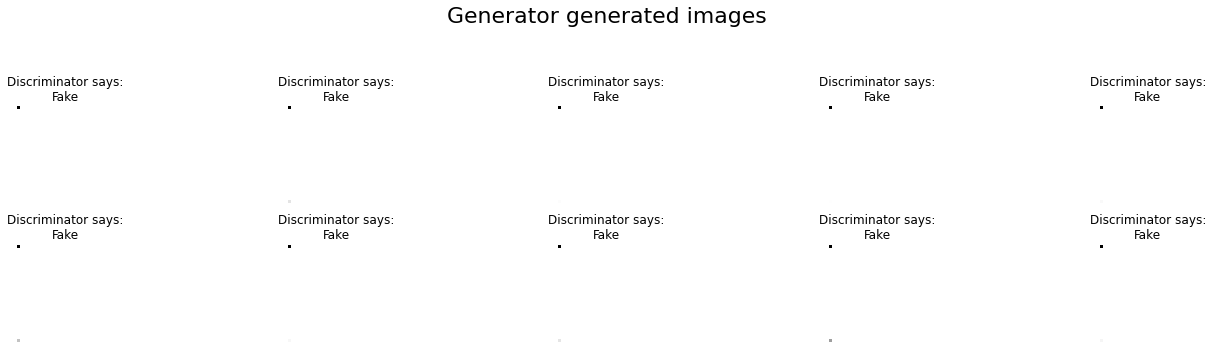

------------------------------------------------------------------------------------------------------------------------


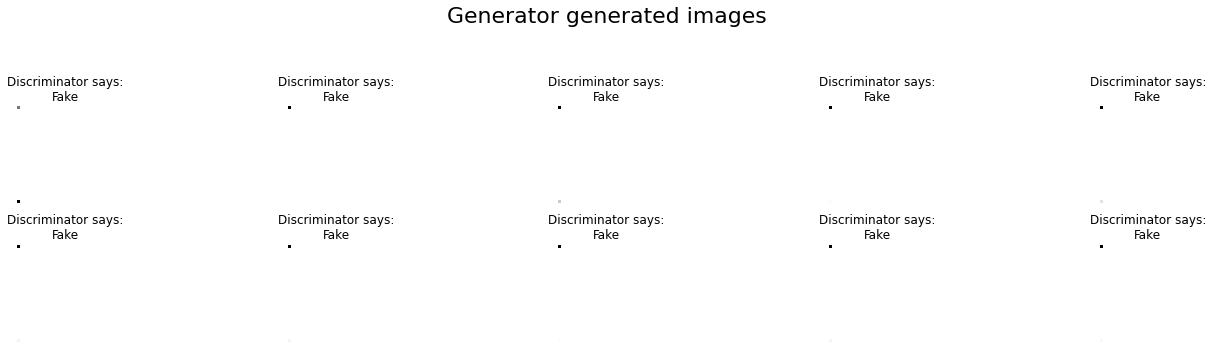

------------------------------------------------------------------------------------------------------------------------


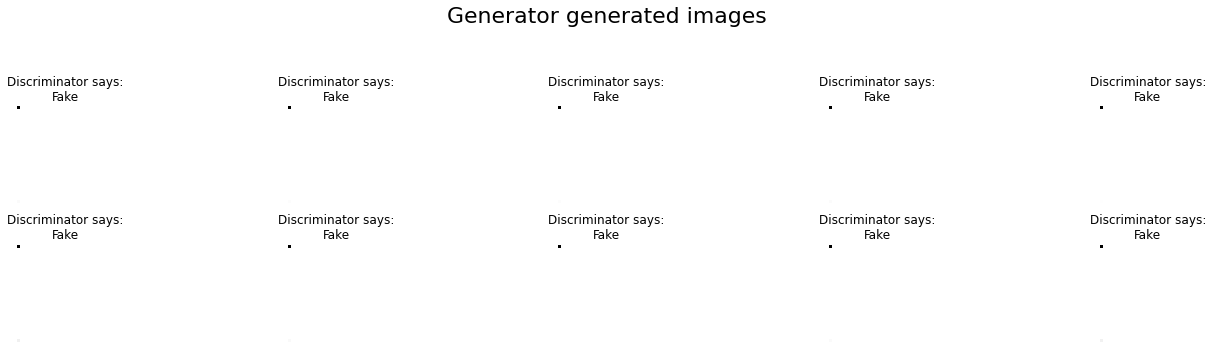

------------------------------------------------------------------------------------------------------------------------


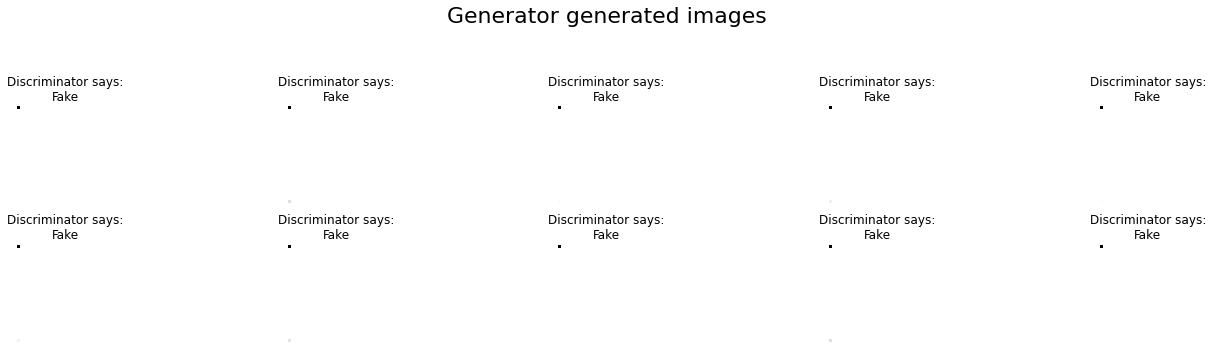

------------------------------------------------------------------------------------------------------------------------


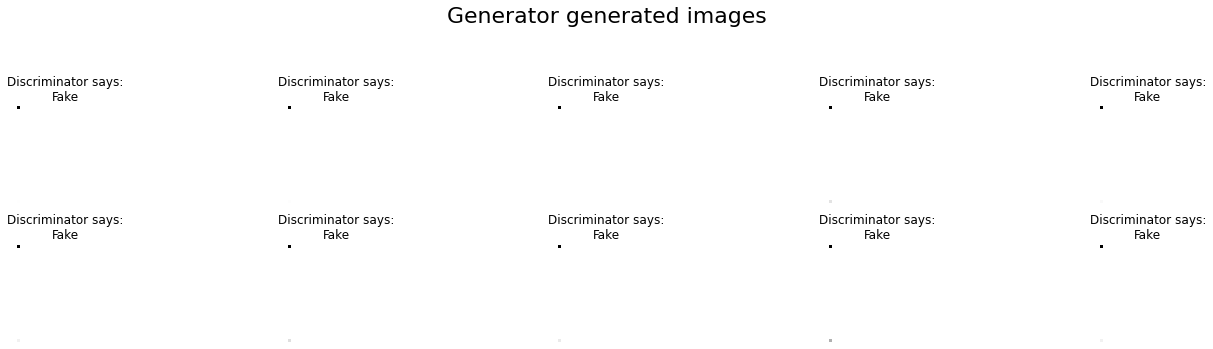

------------------------------------------------------------------------------------------------------------------------


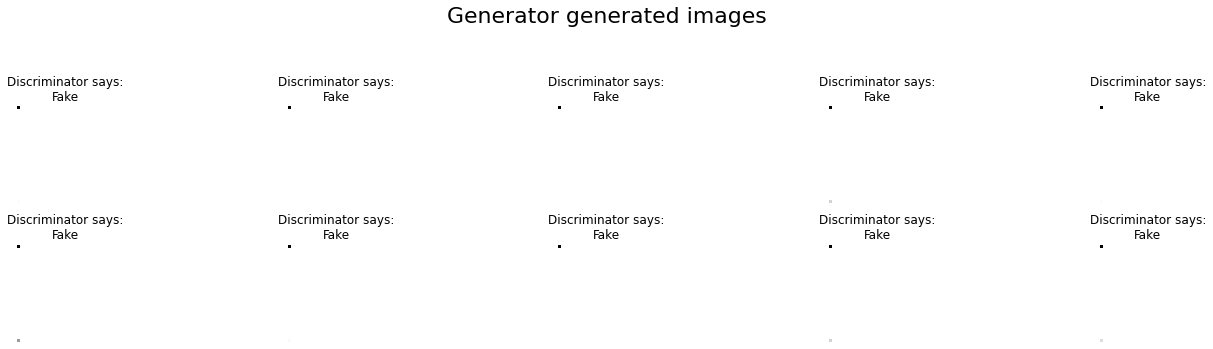

------------------------------------------------------------------------------------------------------------------------


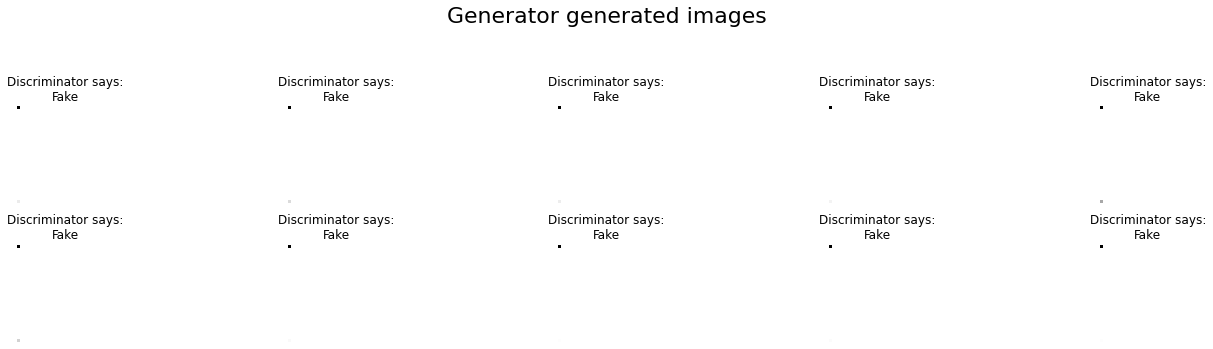

------------------------------------------------------------------------------------------------------------------------


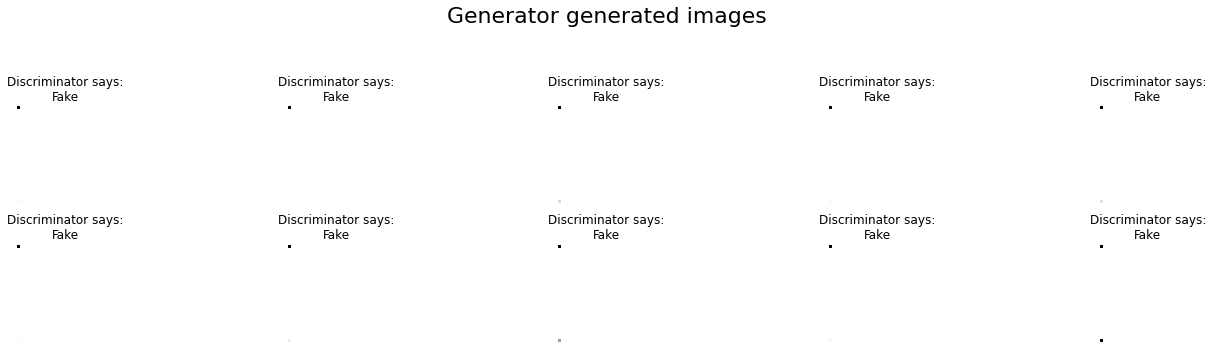

------------------------------------------------------------------------------------------------------------------------


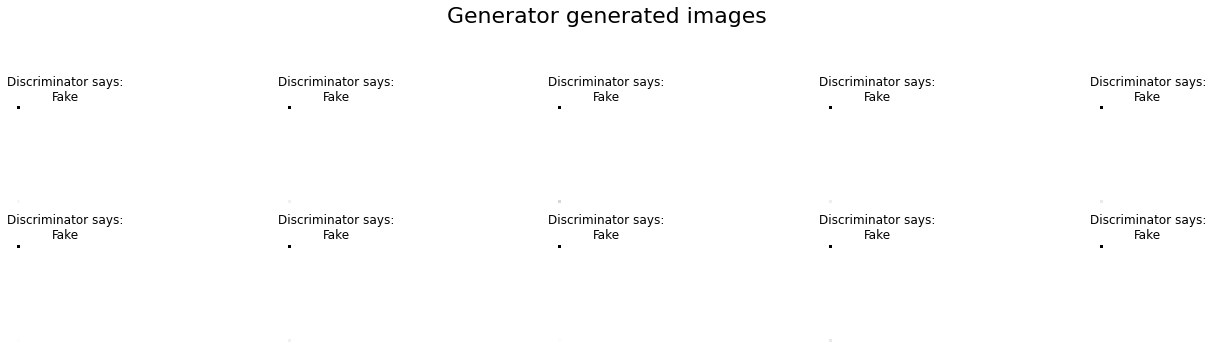

------------------------------------------------------------------------------------------------------------------------


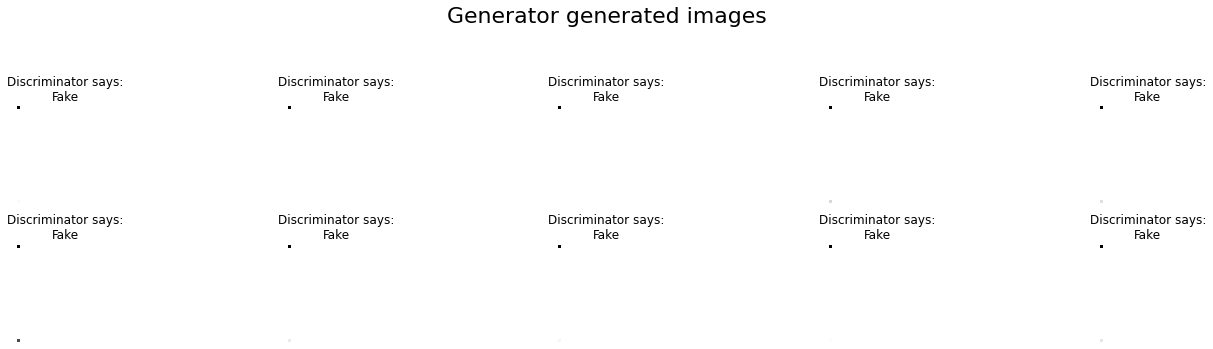

------------------------------------------------------------------------------------------------------------------------


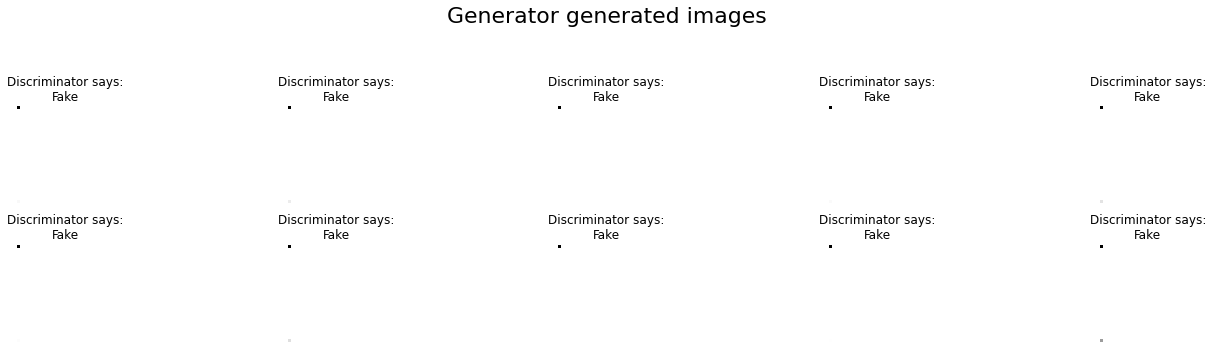

------------------------------------------------------------------------------------------------------------------------


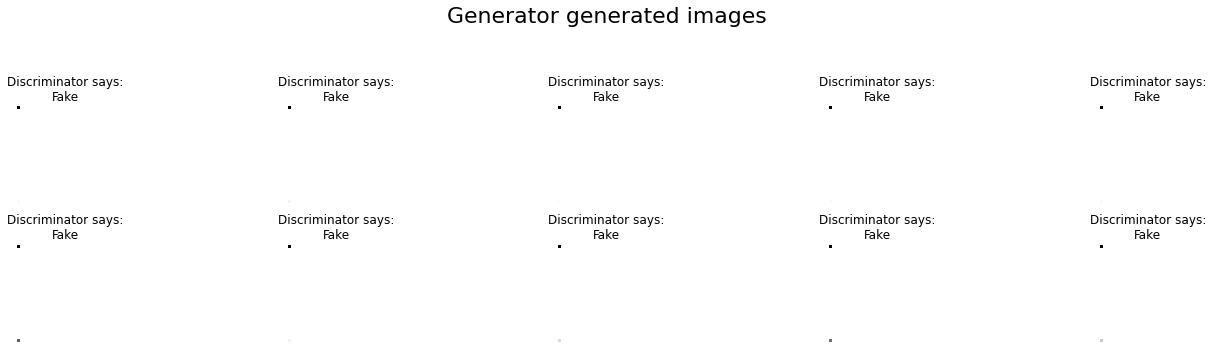

------------------------------------------------------------------------------------------------------------------------


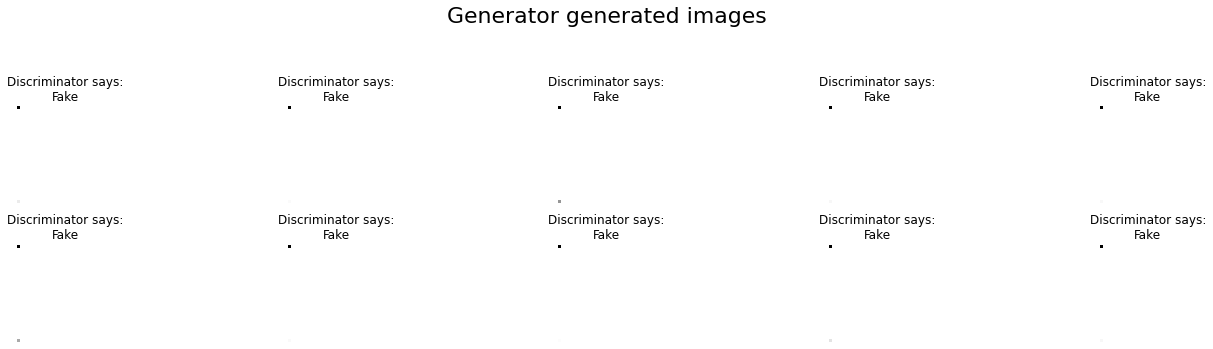

------------------------------------------------------------------------------------------------------------------------


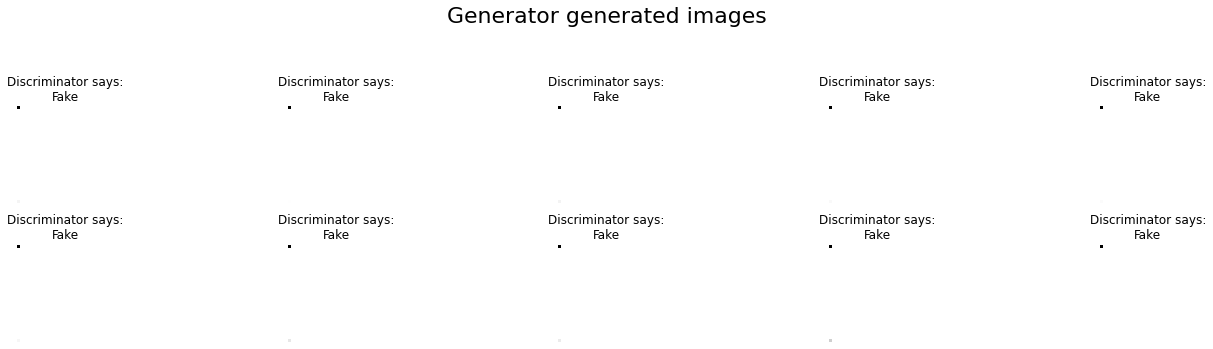

------------------------------------------------------------------------------------------------------------------------


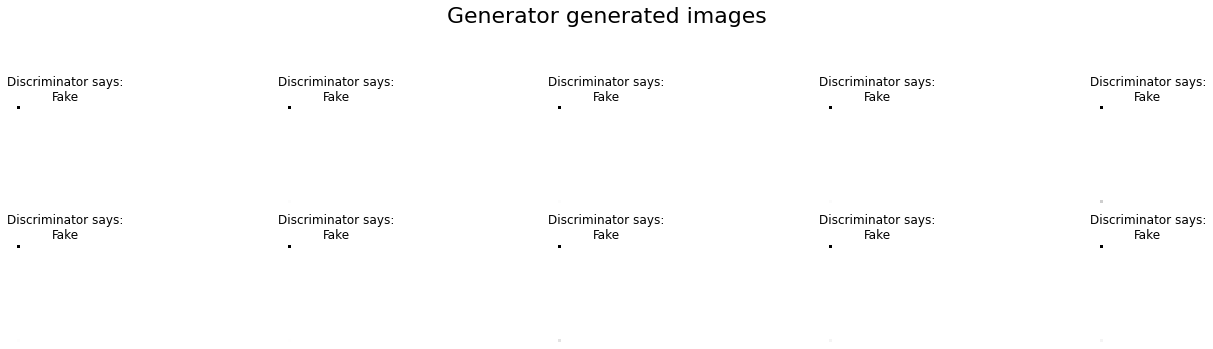

------------------------------------------------------------------------------------------------------------------------


In [ ]:
batch_size=128 # tamaño del batch
plt.rcParams["figure.figsize"]=[20,4]
for epoch in range(20): #epochs a realizar
    for batch in range(int(x.shape[0]/batch_size)): #n° de batchs a realizar según el tamaño batch_size
      # train discriminator
      ix = np.random.randint(0, x.shape[0], batch_size) # generamos índices para samplear imágenes del dataset, sampleamos batch_size=128 datos
      x_real = x[ix]  # seleccionamos las imágenes
      noise = np.random.rand(noise_size * batch_size) # generamos ruido, según el tamaño de la entrada de nuestro generador
      noise = noise.reshape((batch_size, noise_size)) # reshape (batch_size,noise_size) sized noise
      x_false = generator_net.predict(noise) # generamos imágenes fake según el ruido
      y_real= np.ones((batch_size, 1)) # etiquetas real
      y_false = np.zeros((batch_size, 1)) #etiquetas fake
      x_train = np.concatenate((x_real, x_false)) # x_train-> imágenes reales + imágenes fakes
      y_train = np.concatenate((y_real, y_false)) # y_train-> etiquetas reales + etiquetas fakes
      response_dis = discriminator.train_on_batch(x_train, y_train) #train discriminator
      # train generator
      noise2 = np.random.rand(noise_size * batch_size) # generamos ruido nuevamente según el tamaño de la entrada de nuestro generador
      noise2 = noise2.reshape((batch_size, noise_size)) # reshape (batch_size,noise_size) sized noise
      response_gen = gan.train_on_batch(noise2 , np.ones((batch_size, 1))) # output is 1, as generator needs to convine discriminator (trainable false) w/ fake images from noise
      if batch%(200)==0: # cada cuánto plotear es ajustable
          # plot random generated images, discriminator image inputs and outputs, and losses and accuracies
          plt.suptitle("Generator generated images", y=1.2,size=22)
          for i in range(10):
            plt.subplot(2, 5, 1 + i)
            plt.title("Discriminator says:\n"+ ["Fake","Real"][int(np.round(discriminator.predict(x_false[i:i+1, :, :, :])[0,0],0))])
            plt.axis('off')
            plt.imshow(x_false[i, :, :, 0], cmap='gray_r')
          plt.tight_layout()
          plt.show()
          print("-"*120)
          
          # plt.suptitle("Real images", y=1.2,size=22)
          # for i in range(10):
          #   plt.subplot(2, 5, 1 + i)
            # plt.title("Discriminator says:\n"+ ["Fake","Real"])
            # plt.imshow(,cmap='gray_r')

## 4.b) Mejora de GAN.

Utilizando el código modificado en el punto 4.b y lo aprendido durante el ramo. Modifique la arquitectura de la red neuronal a modo de obtener imágenes fake sean convincentes. Adicionalmente responda/comente según lo que observa durante el entrenamiento de la red neuronal.

* Explicar el comportamiento de la evolución de ambos desempeños y por qué no necesariamente esos valores representan que la red alcance su cometido
* Describir, teórica o práctiamente, que ocurriría si la red generadora no pudiera por algún motivo (divergencia en entrenamiento, excesivo _underfitting_, etc) generar imágenes razonables.
* Describir la contraparte de lo que ocurriría si la red discriminadora no pudiera aprender a diferenciar imagenes reales de ruido aleatorio.


Una vez teniendo una red entrenada a completitud, muestre varias imagenes generadas. ¿Se logra obtener imágenes convincentes?. Igualmente con la red entrenada, guarde el ruido aleatorio que origina dos números reconocibles distintos. ¿Qué ocurre si vemos las imagenes generadas por el generador al entregarle el vector del promedio entre los dos puntos?


## Pregunta **Bonus**

* Proponga o investigue como realizaría las siguientes tareas:
    * A partir de una base de datos de imagenes RGB, entrenar una GAN que genere imágenes a color convincentes a partir de imagenes en blanco y negro, es decir que deduzca el color a partir de imagenes en blanco y negro.
    * A partir de una base de datos de cuadros de paisajes reales y las fotos correspondientes al cuadro, entrenar una GAN que permita transformar fotografias a cuadros y viceversa (puede utilizar más de 2 redes)
    * Proponga un problema que les parezca interesante y una estructura de GAN que le permitiría resolverlo